Autovettori in (11) =
 [[-0.5   -0.707  0.    -0.5  ]
 [ 0.5    0.    -0.707 -0.5  ]
 [-0.5    0.707  0.    -0.5  ]
 [ 0.5   -0.     0.707 -0.5  ]]
Coefficienti degli stati |k> con k=π/a (11),(1 -1),(-1 -1), (-1 1)


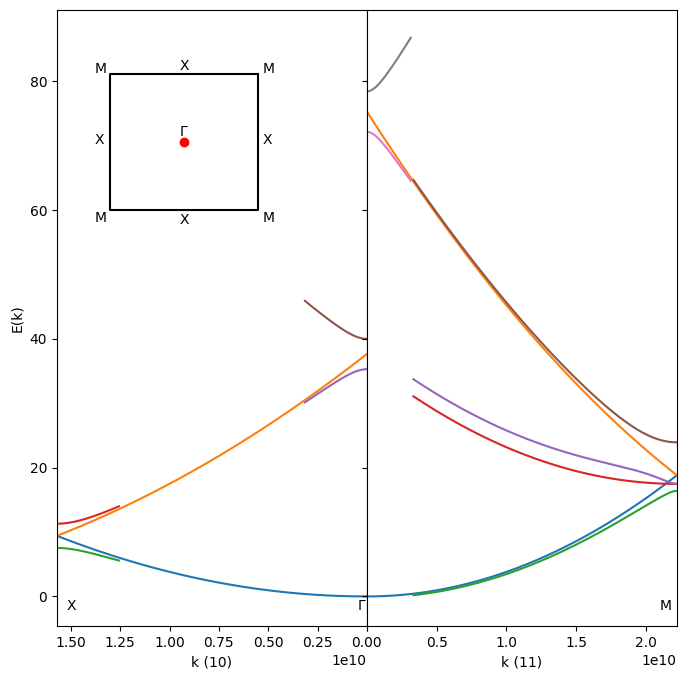

In [14]:
import numpy as np
from numpy.linalg import eigh 
import matplotlib.pyplot as P
# square lattice parameter a = 0.2 nm
hbar = 1.054e-34
a = 0.2e-9
m = 0.911e-30
e = 1.6e-19
N = 1e7 
L = N*a
dk = 2*np.pi/L
G = 2*np.pi/a
G2 = 2*np.pi*np.sqrt(2)/a
k10 = np.array([G/2,0])
k01 = np.array([0,G/2])
k11 = np.array([G/2,G/2])
km0 = np.array([-G/2,0])
k0m = np.array([0,-G/2])
kmm = np.array([-G/2,-G/2])
km1 = np.array([-G/2,G/2])
k1m = np.array([G/2,-G/2])
E0 = hbar**2/2/m*G**2/4/e
V10 = E0/5
V11 = E0/7
V20 = E0/4
V22 = E0/3
kx = np.linspace(0,G/2,1001)
Ekx = hbar**2/2/m*kx**2/e
Ekxf = hbar**2/2/m*(kx-G)**2/e
kxy = np.linspace(0,G/np.sqrt(2),1001)
Ekxy = hbar**2/2/m*kxy**2/e
Ekxyf = hbar**2/2/m*(kxy-G2)**2/e
fig,[ax,axy] = P.subplots(1,2,figsize=(8,8),sharey=True)
ax.plot(kx,Ekx)
ax.plot(kx,Ekxf)
kxx = np.linspace(G/2*0.8,G/2,201)
E0,E1 = np.zeros(kxx.shape), np.zeros(kxx.shape)
for j,kx in enumerate(kxx):
    # assegnare eigenvalues a vttori d'onda, E- a I zona, ed E+ a II zona folded 
    e0 = hbar**2/2/m*kx**2/e # questo è il vettor d'onda della I ZB che si avvicina a (10)
    e0m = hbar**2/2/m*(kx-G)**2/e # questo è il vettor d'onda che si avvicina a (-1 0) dalla II ZB
    H = np.array([[e0,V10],[V10,e0m]])
    u,v = eigh(H)
    E0[j],E1[j] = u[0],u[1]
ax.plot(kxx,E0)
ax.plot(kxx,E1)
kxx = np.linspace(0,G*0.1,201)
for j,kx in enumerate(kxx):
    # assegnare eigenvalues a vttori d'onda, E- a II zona, ed E+ a III zona folded 
    e0 = hbar**2/2/m*(G-kx)**2/e 
    e0m = hbar**2/2/m*(G+kx)**2/e 
    H = np.array([[e0,V20],[V20,e0m]])
    u,v = eigh(H)
    E0[j],E1[j] = u[0],u[1]
ax.plot(kxx,E0)
ax.plot(kxx,E1)

axy.plot(kxy,Ekxy)
axy.plot(kxy,Ekxyf)
kxxyy = np.linspace(G2/2*0.15,G2,201)
E0,E1,E2,E3 = np.zeros(kxxyy.shape), np.zeros(kxxyy.shape), np.zeros(kxxyy.shape), np.zeros(kxxyy.shape)
for j,kxy in enumerate(kxxyy):
    e11 = hbar**2/2/m*kxy**2/e  # questo è il vettor d'onda che si avvicina dalla I ZB a (11)
    e1m  = hbar**2/2/m*(kxy**2+G**2-np.sqrt(2)*kxy*G)/e # questo è il vettor d'onda che si avvicina dalla II ZB a (-1 1) oppure a (1 -1)
    emm  = hbar**2/2/m*(kxy-G2)**2/e # questo è il vettor d'onda che si avvicina dalla III ZB a (-1 -1)
    H = np.array([[e11,V10,V11,V10],[V10,e1m,V10,V11],[V11,V10,emm,V10],[V10,V11,V10,e1m]])
    u,v = eigh(H)
    E0[j],E1[j],E2[j],E3[j] = u[0],u[1],u[2],u[3]
e0 = hbar**2/2/m*(G2/2)**2/e
H = np.array([[e0,V10,V11,V10],[V10,e0,V10,V11],[V11,V10,e0,V10],[V10,V11,V10,e0]])
u,v = eigh(H)
np.set_printoptions(precision=3,suppress=True)
print('Autovettori in (11) =\n',v)
print(r'Coefficienti degli stati |k> con k=π/a (11),(1 -1),(-1 -1), (-1 1)')
axy.plot(kxxyy,E0)
axy.plot(kxxyy,E1)
axy.plot(kxxyy,E2)
axy.plot(kxxyy,E3)

kxxyy = np.linspace(0,G2*0.1/np.sqrt(2),201)
for j,kxy in enumerate(kxxyy):
    # assegnare eigenvalues a vttori d'onda, E- a II zona, ed E+ a III zona folded 
    e0 = hbar**2/2/m*(G2-kxy)**2/e
    e0m = hbar**2/2/m*(G2+kxy)**2/e
    H = np.array([[e0,V22],[V22,e0m]])
    u,v = eigh(H)
    E0[j],E1[j] = u[0],u[1]
axy.plot(kxx,E0)
axy.plot(kxx,E1)

ax.set_xlim((0,G/2))
axy.set_xlim(0,G/np.sqrt(2))
xlabs = axy.get_xticks()
P.setp(axy.get_xticklabels()[0], visible=False)
ax.set_ylabel('E(k)')
ax.set_xlabel('k (10)')
axy.set_xlabel('k (11)')
ax.text(5e8,-2,r'$\Gamma$')
ax.text(1.52e10,-2,'X')
ax.invert_xaxis()
axy.text(2.1e10,-2,'M')

ax.plot([0.55e10,1.3e10,1.3e10,0.55e10,0.55e10],[81,81,60,60,81],'k-')
ax.plot(0.925e10,70.5,'ro')
ax.text(0.95e10,71.5,r'$\Gamma$')
ax.text(1.38e10,81.2,'M')
ax.text(0.53e10,81.2,'M')
ax.text(1.38e10,58.2,'M')
ax.text(0.53e10,58.2,'M')
ax.text(1.38e10,70.2,'X')
ax.text(0.53e10,70.2,'X')
ax.text(0.95e10,81.7,'X')
ax.text(0.95e10,57.8,'X')

P.subplots_adjust(wspace=0)
P.show()